<a href="https://www.kaggle.com/code/yahyasoker/gdp-usd-per-capita-income-united-nations-estimate?scriptVersionId=127914848" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### [1.Preparing Data](#1)
### [2.Training Data](#2)
### [3.Predicting](#3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

<a id='1'></a>
### 1.Perparing Data

In [2]:
df = pd.read_csv("/kaggle/input/gdp-in-usd-per-capita-income-by-country/List of Countries by GDP (nominal) per Capita.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         223 non-null    float64
 1   Country/Territory  223 non-null    object 
 2   UN Region          223 non-null    object 
 3   IMF                224 non-null    object 
 4   Unnamed: 4         224 non-null    object 
 5   World Bank         224 non-null    object 
 6   Unnamed: 6         224 non-null    object 
 7   United Nations     224 non-null    object 
 8   Unnamed: 8         224 non-null    object 
dtypes: float64(1), object(8)
memory usage: 15.9+ KB


In [3]:
df.head()

,Unnamed: 0,Country/Territory,UN Region,IMF,Unnamed: 4,World Bank,Unnamed: 6,United Nations,Unnamed: 8
0,NaN,NaN,NaN,Estimate,Year,Estimate,Year,Estimate,Year
1,1.0,Monaco,Europe,0,0,234316,2021,234317,2021
2,2.0,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,3.0,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,4.0,Ireland,Europe,114581,2023,100172,2021,101109,2021


In [4]:
# fixing column names
df.rename(columns = {'Unnamed: 4':'Imf_year'}, inplace = True)
df.rename(columns = {'World Bank':'World_bank_estimate'}, inplace = True)
df.rename(columns = {'Unnamed: 6':'World_bank_year'}, inplace = True)
df.rename(columns = {'Unnamed: 4':'Imf_year'}, inplace = True)
df.rename(columns = {'United Nations':'United_nations_estimate'}, inplace = True)
df.rename(columns = {'Unnamed: 8':'United_nations_Year'}, inplace = True)


In [5]:
df.head()

,Unnamed: 0,Country/Territory,UN Region,IMF,Imf_year,World_bank_estimate,World_bank_year,United_nations_estimate,United_nations_Year
0,NaN,NaN,NaN,Estimate,Year,Estimate,Year,Estimate,Year
1,1.0,Monaco,Europe,0,0,234316,2021,234317,2021
2,2.0,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,3.0,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,4.0,Ireland,Europe,114581,2023,100172,2021,101109,2021


In [6]:
# dropping unnecesary columns
df = df.drop(index=0)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Country/Territory', axis=1)

In [7]:
df.head()

,UN Region,IMF,Imf_year,World_bank_estimate,World_bank_year,United_nations_estimate,United_nations_Year
1,Europe,0,0,234316,2021,234317,2021
2,Europe,0,0,157755,2020,169260,2021
3,Europe,132372,2023,133590,2021,133745,2021
4,Europe,114581,2023,100172,2021,101109,2021
5,Americas,0,0,114090,2021,112653,2021


In [8]:
df['UN Region'].value_counts()

Africa      55
Asia        51
Europe      48
Americas    48
Oceania     20
World        1
Name: UN Region, dtype: int64

In [9]:
# changing string values to int for easier use
df.replace({"UN Region":{"Africa":0,"Asia":1,"Europe":2,"Americas":3,"Oceania":4,"World":5}},
           inplace=True)

In [10]:
df.head()

,UN Region,IMF,Imf_year,World_bank_estimate,World_bank_year,United_nations_estimate,United_nations_Year
1,2,0,0,234316,2021,234317,2021
2,2,0,0,157755,2020,169260,2021
3,2,132372,2023,133590,2021,133745,2021
4,2,114581,2023,100172,2021,101109,2021
5,3,0,0,114090,2021,112653,2021


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 1 to 223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   UN Region                223 non-null    int64 
 1   IMF                      223 non-null    object
 2   Imf_year                 223 non-null    object
 3   World_bank_estimate      223 non-null    object
 4   World_bank_year          223 non-null    object
 5   United_nations_estimate  223 non-null    object
 6   United_nations_Year      223 non-null    object
dtypes: int64(1), object(6)
memory usage: 13.9+ KB


In [12]:

# Replace '[n 10]2021' with NaN
df = df.replace('[n 10]2021', float('nan'))

# Drop rows with NaN value
df = df.dropna()

In [13]:
# changing values to float for easier use
df['IMF'] = df['IMF'].astype(float)
df['Imf_year'] = df['Imf_year'].astype(float)
df['World_bank_estimate'] = df['World_bank_estimate'].astype(float)
df['World_bank_year'] = df['World_bank_year'].astype(float)
df['United_nations_estimate'] = df['United_nations_estimate'].astype(float)
df['United_nations_Year'] = df['United_nations_Year'].astype(float)

In [14]:
# separating labels
x = df.drop(['United_nations_estimate'],axis=1)
y = df['United_nations_estimate']

<AxesSubplot:>

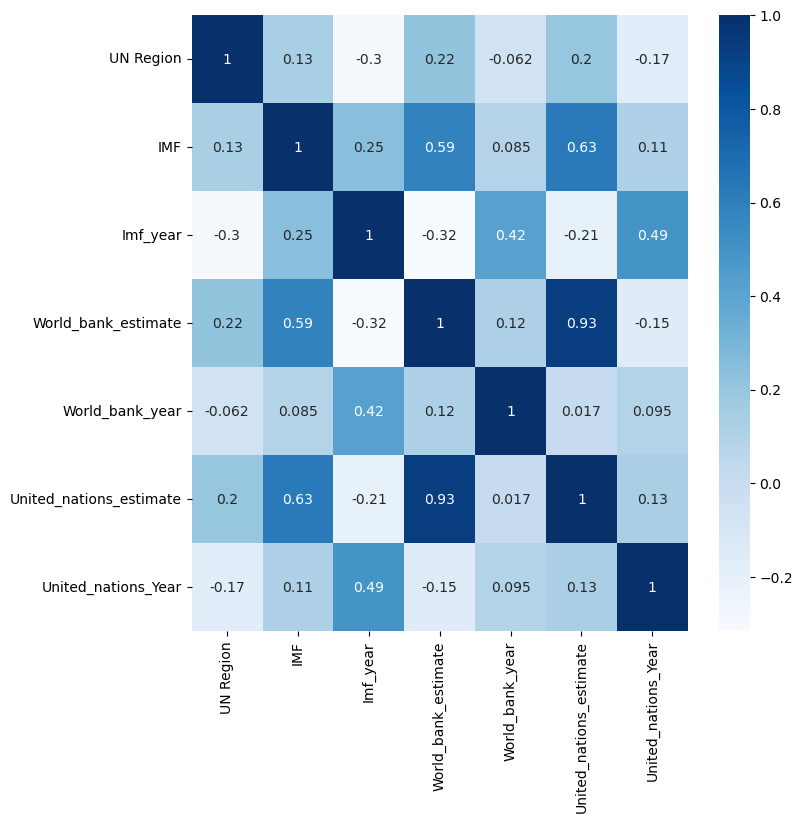

In [15]:
# looking correlation 
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap="Blues",annot=True)

<a id='2'></a>
### 2.Training Data

In [16]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)
# Train a RandomForestRegressor model on the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

<a id='3'></a>
### 3. Predicting

In [17]:
# Make predictions on the train data
training_data_pred = model.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_pred)
print(f"R squared value: {r2_train}")

R squared value: 0.9144894026128031


In [18]:
# Make predictions on the test data
test_data_pred = model.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_pred)
print(f"R squared value: {r2_test}")

R squared value: 0.7933779324421648
